## Práctica 6. Regresión Lineal

### Dataset: RossmanV1 (Train)

### RossmanV1 (Ridge, Lasso, Polynomial, Polynomial cubic case)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
rossman=pd.read_csv('train.csv')
rossman.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [3]:
rossman.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [4]:
rossman.StateHoliday = rossman.StateHoliday.astype(str)
def count_unique(column):
    return len(column.unique())

rossman.apply(count_unique, axis=0).astype(np.int32)

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int32

In [5]:
rossman.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

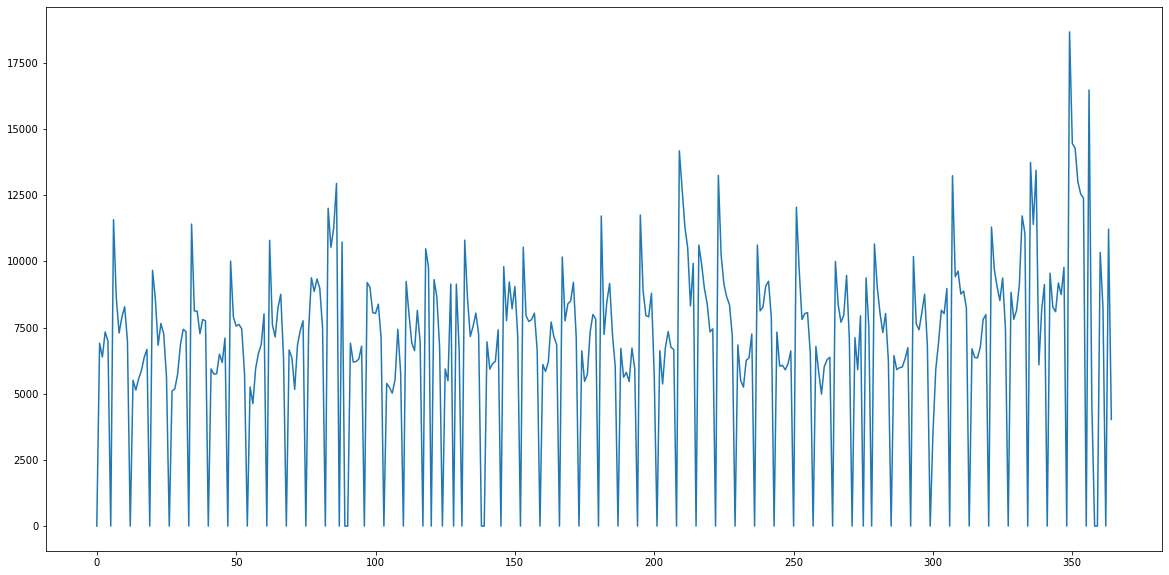

In [6]:
store_data = rossman[rossman.Store==150].sort_values('Date')
plt.figure(figsize=(20, 10))
plt.plot(store_data.Sales.values[:365])

<ipython-input-7-1909a9fa42ed>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=store_data[rossman.Open==1].Promo, y=store_data[rossman.Open==1].Sales, alpha=0.1)
<ipython-input-7-1909a9fa42ed>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(x=store_data[rossman.Open==1].Promo, y=store_data[rossman.Open==1].Sales, alpha=0.1)


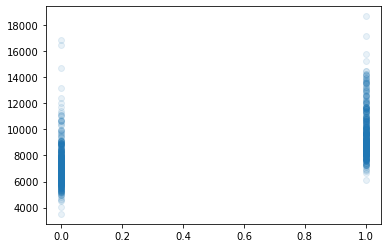

In [7]:
plt.scatter(x=store_data[rossman.Open==1].Promo, y=store_data[rossman.Open==1].Sales, alpha=0.1)

In [8]:
rossmanTransformada = rossman.drop(['Store', 'Date', 'Customers'], axis=1)
rossmanTransformada = pd.get_dummies(rossmanTransformada, columns=['DayOfWeek', 'StateHoliday'])
rossmanTransformada = rossmanTransformada[0:500000]
rossmanTransformada.shape

(500000, 15)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


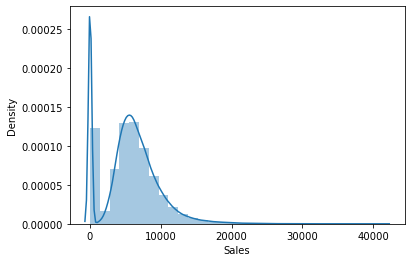

In [9]:
sns.distplot(rossman['Sales'], bins=30)
plt.show()

In [10]:
X = rossmanTransformada.drop(['Sales'], axis=1)
y = rossmanTransformada.Sales

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape, X_test.shape ,Y_train.shape, Y_test.shape)

(400000, 14) (100000, 14) (400000,) (100000,)


### Modelo de Regresión Lineal 

In [11]:
modeloLineal = LinearRegression()
modeloLineal.fit(X_train, Y_train)
print('Interseccion:', modeloLineal.intercept_)
print('Pendiente:', modeloLineal.coef_)

Interseccion: 406249541046291.7
Pendiente: [ 8.24757169e+03  2.23632348e+03  1.95819011e+02  1.22787243e+14
  1.22787243e+14  1.22787243e+14  1.22787243e+14  1.22787243e+14
  1.22787243e+14  1.22787243e+14 -5.29036784e+14 -5.29036784e+14
 -5.29036784e+14 -5.29036784e+14]


In [12]:
# Evaluacion del modelo lineal
y_train_predict = modeloLineal.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
RLinealScoreE = r2_score(Y_train, y_train_predict) # es el r2

y_test_predict = modeloLineal.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
RLinealScoreT= r2_score(Y_test, y_test_predict)

### Técnica Ridge

In [13]:
ridge = Ridge(alpha=0.1).fit(X_train, Y_train)
RidgeScoreE=ridge.score(X_train, Y_train)
RidgeScoreT=ridge.score(X_test, Y_test)

### Técnica  Lasso

In [14]:
lasso = Lasso(alpha=0.1, max_iter=10).fit(X_train, Y_train)
LassoScoreE=lasso.score(X_train, Y_train)
LassoScoreT=lasso.score(X_test, Y_test)
features=np.sum(lasso.coef_ != 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1294909753580.1377, tolerance: 616169016.0289341
  model = cd_fast.enet_coordinate_descent(


### Polynomial

In [15]:
grado3 = PolynomialFeatures(degree=3)
X_grado3 = grado3.fit_transform(X_train)
lm_grado3 = modeloLineal.fit(X_grado3, Y_train)

y_grado3_fit_train = lm_grado3.predict(grado3.fit_transform(X_train))
grado3_r2E = r2_score(Y_train, y_grado3_fit_train) #lm.predict(X_quad))
#grado2_r2E = r2_score(Y_train, y_grado2_fit)
y_grado3_fit = lm_grado3.predict(grado3.fit_transform(X_test))
grado3_r2T = r2_score(Y_test, y_grado3_fit) #lm.predict(X_quad))

### Resumen

In [16]:
cabeceras= ["Entrenamiento","Test","Features"]
valores= [[RLinealScoreE,RidgeScoreE,LassoScoreE,grado3_r2E ],
          [RLinealScoreT,RidgeScoreT,LassoScoreT,grado3_r2T],
          ["--","--",features,"--"]]
resumen = pd.DataFrame(data=valores, index=cabeceras,columns = ["Modelo Lineal","Ridge","Lasso","Polinomial Cubo"])
resumen

,Modelo Lineal,Ridge,Lasso,Polinomial Cubo
Entrenamiento,0.55985,0.55985,0.559616,0.56822
Test,0.565971,0.56597,0.565564,0.575756
Features,--,--,14.000000,--


### Interpretación

|Interpretación|
|:---|
|La regresión lineal simple aplicada a la muestra (500.000 observaciones) ofrece mejor ajuste que las técnicas|
|Ridge, Lasso y polinomial de grado 3|